## A Machine Learning Approach to combine all three modalities i.e. Audio, Micro-Expression and Gaze

Audio, gaze and Microexpression is combined using a Classifier and importance for each modality is plotted

In [226]:
import sys
sys.path.append('/home/adrikamukherjee/venv/lib/python3.6/site-packages')

In [227]:
#import necessary packages
import os, sys, glob, csv, numpy as np, pandas as pd, matplotlib.pyplot as plt, tensorflow as tf, IPython.display as ipd, keras
from sklearn import model_selection, preprocessing
from os import walk, path
from tensorflow.keras import models, layers, optimizers, preprocessing as KRSpreps, utils as KRSutils
import xgboost as xgb
from tensorflow.keras import utils as np_utils
import re
from sklearn import metrics
import matplotlib.pyplot as plt
import glob
import datetime
from sklearn.model_selection import train_test_split

### Create Dictionary and store paths for all different Modalities(Audio, Micro-expression and Gaze)

In [228]:
data_path = {}
data_path['audiodata_path'] = "/home/adrikamukherjee/Audio_Features/csv_full_audio"
data_path['gazedata_path'] = "/home/adrikamukherjee/Gaze_Features"
data_path['mexpdata_path'] = "/home/adrikamukherjee/Mexp_Features"

### Checking No. of files in each of Audio, Micro-expression & Gaze Folders && Shape of the Dataframes

In [229]:
c_gaze=0
c_mexp=0
c_audio=0
for gazefilepath in glob.glob(os.path.join(data_path['audiodata_path'], '*.csv')):
    c_gaze +=1
for audiofilepath in glob.glob(os.path.join(data_path['gazedata_path'], '*.csv')):
    c_audio +=1
for mexpdatapath in glob.glob(os.path.join(data_path['mexpdata_path'], '*.csv')):
    c_mexp +=1
    
print("Number of Gaze Data : " + str(c_gaze))
print("Number of Audio Data : " + str(c_audio))
print("Number of Mexp Data : " + str(c_mexp))

Number of Gaze Data : 657
Number of Audio Data : 657
Number of Mexp Data : 657


## Creating Dictionaries of Audio, Micro-expression & Gaze
Remove Initials and Make the Keys Same for the Same data

In [230]:
from glob import glob

In [231]:
data_shape_all = pd.DataFrame()
for key in data_path.keys():
    count = 0
    data_shape, file_names = [], []
    for filepath in glob(os.path.join(data_path[key], '*.csv')):
        file_shape = pd.read_csv(filepath).shape
        data_shape.append([file_shape[0], file_shape[1]])
        filename = path.basename(filepath)
        for reps in (("Gaze_", ""), ("Audio_", ""), ("Mexp_", "")):
            filename = filename.replace(*reps)
        file_names.append(filename)
        count+=1
    data_shape = pd.DataFrame(data_shape)
    data_shape.columns = [key + str(0), key +str(1)]
    data_shape.index = pd.Series(file_names)
    data_shape_all = pd.concat([data_shape_all, data_shape], axis = 1)
    print(f"No. of file in {key}: ", count)
data_shape_all

No. of file in audiodata_path:  657


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


No. of file in gazedata_path:  657
No. of file in mexpdata_path:  657


,audiodata_path0,audiodata_path1,gazedata_path0,gazedata_path1,mexpdata_path0,mexpdata_path1
BagOfLies_User_0_run_0_video.csv,1,992,245,295,245,48
BagOfLies_User_0_run_1_video.csv,1,992,211,295,211,48
BagOfLies_User_0_run_2_video.csv,1,992,231,295,231,48
BagOfLies_User_0_run_3_video.csv,1,992,210,295,210,48
BagOfLies_User_0_run_4_video.csv,1,992,167,295,167,48
BagOfLies_User_0_run_5_video.csv,1,992,220,295,220,48
BagOfLies_User_10_run_0_video.csv,1,992,187,295,187,48
BagOfLies_User_10_run_1_video.csv,1,992,211,295,211,48
BagOfLies_User_10_run_2_video.csv,1,992,245,295,245,48
BagOfLies_User_10_run_3_video.csv,1,992,263,295,263,48


In [249]:
audio_dict, gaze_dict, mexp_dict = {}, {}, {}
listofdicts = [audio_dict, gaze_dict, mexp_dict]
for key, data_dict_indiv in zip(data_path.keys(), listofdicts):
    for filepath in glob(path.join(data_path[key], '*.csv')):
        data = pd.read_csv(filepath)
        filename = path.basename(filepath)
        for reps in (("Gaze_", ""), ("Audio_", ""), ("Mexp_", "")):
            filename = filename.replace(*reps)
        data_dict_indiv[filename] = data

### Checking If the Labels are Same for Same Keys in Each Dcitionaries & Separating Labels from Training Data

In [250]:
filename_dictkeys = list(audio_dict)
label_dict = {}
for key in filename_dictkeys:
    audiodata, gazedata, mexpdata = audio_dict[key], gaze_dict[key], mexp_dict[key]
    label_audio = audiodata.loc[:, "label"].unique()[0]
    label_gaze = gazedata.loc[:, "label"].unique()[0]
    label_mexp = mexpdata.loc[:, "label"].unique()[0]
    label_set = set([label_audio, label_gaze, label_mexp])
    if len(label_set) > 1:
        print(key)
    else:
        label_dict[key] = list(label_set)[0]

### Encode labels and store it in a dictionary with the universal keys that holds all the data

In [ ]:
label_to_num = lambda value: 0 if value == 'Truthful' else 1
label_dict_num = {key: label_to_num(value) for key, value in label_dict.items()}
label_dict_num

### Mean vector for all the modalities is calculated

frame wise data is replaced by single row which can be efficiently handled by Machine Learning Models

In [252]:
df_list_mexp, df_list_audio, df_list_gaze,df_label  = [], [], [], []
for key in filename_dictkeys:
    audio_dict[key].drop(["name", "frameTime", "Unnamed: 0", "label"], axis = 1, inplace = True)
    audio_dict[key]=audio_dict[key].mean(axis=0)
    gaze_dict[key].drop(["frame", "Unnamed: 0", "label"], axis = 1, inplace = True)
    gaze_dict[key]=gaze_dict[key].mean(axis=0)
    mexp_dict[key].drop(["frame", "Unnamed: 0", "label"], axis = 1, inplace = True)
    mexp_dict[key]=mexp_dict[key].mean(axis=0)
    mexp_individual=mexp_dict[key].to_numpy()
    audio_individual=audio_dict[key].to_numpy()
    gaze_individual=gaze_dict[key].to_numpy()
    label_individual=label_dict_num[key]
    df_list_mexp.append(mexp_individual)
    df_list_audio.append(audio_individual)
    df_list_gaze.append(gaze_individual)
    df_label.append(label_individual)
    


### Convert Dataframe to numpy arrays

In [253]:
df_list_mexp=np.asarray(df_list_mexp)
df_list_mexp.shape
df_list_audio=np.asarray(df_list_audio)
df_list_audio.shape
df_list_gaze=np.asarray(df_list_gaze)
df_list_gaze.shape

(657, 292)

### Split train and test data && check if the labels are aligned

In [260]:

split1 = train_test_split(df_list_mexp, df_label, test_size=0.1, random_state=42)
split2=  train_test_split(df_list_audio, df_label, test_size=0.1, random_state=42)
split3 = train_test_split(df_list_gaze, df_label, test_size=0.1, random_state=42)
(X_train_m, X_test_m, y_train_m, y_test_m) = split1
(X_train_a, X_test_a, y_train_a, y_test_a) = split2
(X_train_g, X_test_g, y_train_g, y_test_g) = split3

print(np.all(y_test_m == y_test_a))
print(np.all(y_test_a == y_test_g))


True
True


### XGboost is applied on the Audio data

[0]	validation_0-error:0.333333	validation_0-logloss:0.691625	validation_1-error:0.439394	validation_1-logloss:0.692075
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.321489	validation_0-logloss:0.689954	validation_1-error:0.424242	validation_1-logloss:0.691404
[2]	validation_0-error:0.296108	validation_0-logloss:0.688064	validation_1-error:0.409091	validation_1-logloss:0.690501
[3]	validation_0-error:0.299492	validation_0-logloss:0.686526	validation_1-error:0.454545	validation_1-logloss:0.690325
[4]	validation_0-error:0.277496	validation_0-logloss:0.684633	validation_1-error:0.439394	validation_1-logloss:0.689417
[5]	validation_0-error:0.285956	validation_0-logloss:0.682897	validation_1-error:0.424242	validation_1-logloss:0.688168
[6]	validation_0-error:0.284264	validation_0-logloss:0.681197	validation_1-error:0.424242	validation_1-logloss:0.68

[67]	validation_0-error:0.221658	validation_0-logloss:0.61021	validation_1-error:0.378788	validation_1-logloss:0.653954
[68]	validation_0-error:0.218274	validation_0-logloss:0.609237	validation_1-error:0.378788	validation_1-logloss:0.653753
[69]	validation_0-error:0.221658	validation_0-logloss:0.60826	validation_1-error:0.378788	validation_1-logloss:0.653712
[70]	validation_0-error:0.221658	validation_0-logloss:0.607743	validation_1-error:0.378788	validation_1-logloss:0.653173
[71]	validation_0-error:0.221658	validation_0-logloss:0.606312	validation_1-error:0.378788	validation_1-logloss:0.652392
[72]	validation_0-error:0.221658	validation_0-logloss:0.605607	validation_1-error:0.378788	validation_1-logloss:0.65244
[73]	validation_0-error:0.221658	validation_0-logloss:0.604534	validation_1-error:0.378788	validation_1-logloss:0.65234
[74]	validation_0-error:0.219966	validation_0-logloss:0.603612	validation_1-error:0.378788	validation_1-logloss:0.651757
[75]	validation_0-error:0.226734	val

[135]	validation_0-error:0.189509	validation_0-logloss:0.563237	validation_1-error:0.333333	validation_1-logloss:0.63719
[136]	validation_0-error:0.187817	validation_0-logloss:0.562341	validation_1-error:0.333333	validation_1-logloss:0.637101
[137]	validation_0-error:0.189509	validation_0-logloss:0.56176	validation_1-error:0.318182	validation_1-logloss:0.636749
[138]	validation_0-error:0.187817	validation_0-logloss:0.561339	validation_1-error:0.318182	validation_1-logloss:0.636437
[139]	validation_0-error:0.189509	validation_0-logloss:0.560967	validation_1-error:0.318182	validation_1-logloss:0.636261
[140]	validation_0-error:0.187817	validation_0-logloss:0.560422	validation_1-error:0.318182	validation_1-logloss:0.635921
[141]	validation_0-error:0.189509	validation_0-logloss:0.5601	validation_1-error:0.318182	validation_1-logloss:0.635905
[142]	validation_0-error:0.187817	validation_0-logloss:0.559738	validation_1-error:0.318182	validation_1-logloss:0.636076
[143]	validation_0-error:0.1

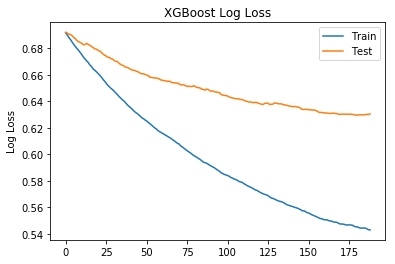

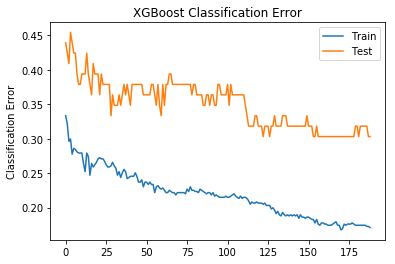

In [294]:
from xgboost.sklearn import XGBClassifier
model_a = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=3, 
                      gamma=10)
eval_set = [(X_train_a, y_train_a), (X_test_a, y_test_a)]
model_a.fit(X_train_a, y_train_a, early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set,verbose=True)
# make predictions for test data
y_pred = model_a.predict(X_test_a)
predictions_audio_test = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test_a, predictions_audio_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model_a.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

### Display the Classification Report

In [295]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test_a, predictions_audio_test))
print ('F1 score:', f1_score(y_test_a, predictions_audio_test))
print ('Recall:', recall_score(y_test_a, predictions_audio_test))
print ('Precision:', precision_score(y_test_a, predictions_audio_test))
print ('\n clasification report:\n', classification_report(y_test_a,predictions_audio_test))
print ('\n confussion matrix:\n',confusion_matrix(y_test_a, predictions_audio_test))

Accuracy: 0.6818181818181818
F1 score: 0.5882352941176471
Recall: 0.4411764705882353
Precision: 0.8823529411764706

 clasification report:
               precision    recall  f1-score   support

           0       0.61      0.94      0.74        32
           1       0.88      0.44      0.59        34

   micro avg       0.68      0.68      0.68        66
   macro avg       0.75      0.69      0.66        66
weighted avg       0.75      0.68      0.66        66


 confussion matrix:
 [[30  2]
 [19 15]]


###  XGboost is applied on gaze data

[0]	validation_0-error:0.353638	validation_0-logloss:0.691904	validation_1-error:0.454545	validation_1-logloss:0.692584
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.340102	validation_0-logloss:0.691111	validation_1-error:0.409091	validation_1-logloss:0.692089
[2]	validation_0-error:0.323181	validation_0-logloss:0.689803	validation_1-error:0.439394	validation_1-logloss:0.691253
[3]	validation_0-error:0.324873	validation_0-logloss:0.688705	validation_1-error:0.439394	validation_1-logloss:0.690477
[4]	validation_0-error:0.333333	validation_0-logloss:0.687331	validation_1-error:0.409091	validation_1-logloss:0.689018
[5]	validation_0-error:0.324873	validation_0-logloss:0.686364	validation_1-error:0.424242	validation_1-logloss:0.689028
[6]	validation_0-error:0.323181	validation_0-logloss:0.685649	validation_1-error:0.409091	validation_1-logloss:0.68

[67]	validation_0-error:0.338409	validation_0-logloss:0.646516	validation_1-error:0.439394	validation_1-logloss:0.664107
[68]	validation_0-error:0.338409	validation_0-logloss:0.646227	validation_1-error:0.439394	validation_1-logloss:0.664039
[69]	validation_0-error:0.340102	validation_0-logloss:0.645326	validation_1-error:0.439394	validation_1-logloss:0.663541
[70]	validation_0-error:0.340102	validation_0-logloss:0.644694	validation_1-error:0.439394	validation_1-logloss:0.662591
[71]	validation_0-error:0.340102	validation_0-logloss:0.644108	validation_1-error:0.439394	validation_1-logloss:0.662422
[72]	validation_0-error:0.341794	validation_0-logloss:0.643445	validation_1-error:0.439394	validation_1-logloss:0.662126
[73]	validation_0-error:0.340102	validation_0-logloss:0.643252	validation_1-error:0.439394	validation_1-logloss:0.662016
[74]	validation_0-error:0.338409	validation_0-logloss:0.642779	validation_1-error:0.439394	validation_1-logloss:0.661711
[75]	validation_0-error:0.338409

[135]	validation_0-error:0.338409	validation_0-logloss:0.629293	validation_1-error:0.424242	validation_1-logloss:0.654154
[136]	validation_0-error:0.333333	validation_0-logloss:0.628833	validation_1-error:0.424242	validation_1-logloss:0.654073
[137]	validation_0-error:0.335025	validation_0-logloss:0.628816	validation_1-error:0.424242	validation_1-logloss:0.654132
[138]	validation_0-error:0.338409	validation_0-logloss:0.628376	validation_1-error:0.424242	validation_1-logloss:0.65389
[139]	validation_0-error:0.338409	validation_0-logloss:0.628369	validation_1-error:0.424242	validation_1-logloss:0.653914
[140]	validation_0-error:0.335025	validation_0-logloss:0.627874	validation_1-error:0.424242	validation_1-logloss:0.653509
[141]	validation_0-error:0.335025	validation_0-logloss:0.627874	validation_1-error:0.424242	validation_1-logloss:0.653509
[142]	validation_0-error:0.335025	validation_0-logloss:0.627574	validation_1-error:0.424242	validation_1-logloss:0.653724
[143]	validation_0-error:

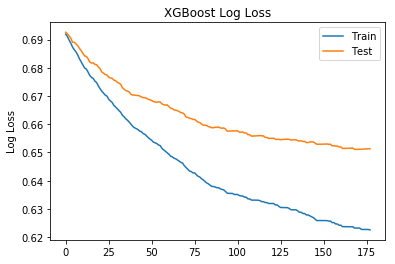

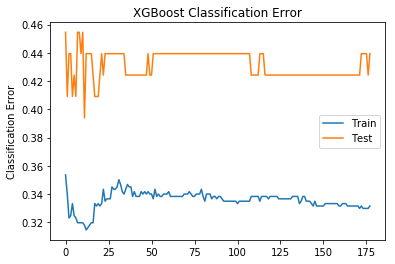

In [296]:
from xgboost.sklearn import XGBClassifier
model_g = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=3, 
                      gamma=10)
eval_set = [(X_train_g, y_train_g), (X_test_g, y_test_g)]
model_g.fit(X_train_g, y_train_g, early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set,verbose=True)
# make predictions for test data
y_pred = model_g.predict(X_test_g)
predictions_gaze_test = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test_g, predictions_gaze_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model_g.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

### Display the Metric Scores and Classification Report

In [297]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test_g, predictions_gaze_test))
print ('F1 score:', f1_score(y_test_g, predictions_gaze_test))
print ('Recall:', recall_score(y_test_g, predictions_gaze_test))
print ('Precision:', precision_score(y_test_g, predictions_gaze_test))
print ('\n clasification report:\n', classification_report(y_test_g,predictions_gaze_test))
print ('\n confussion matrix:\n',confusion_matrix(y_test_g, predictions_gaze_test))

Accuracy: 0.5757575757575758
F1 score: 0.39130434782608703
Recall: 0.2647058823529412
Precision: 0.75

 clasification report:
               precision    recall  f1-score   support

           0       0.54      0.91      0.67        32
           1       0.75      0.26      0.39        34

   micro avg       0.58      0.58      0.58        66
   macro avg       0.64      0.59      0.53        66
weighted avg       0.65      0.58      0.53        66


 confussion matrix:
 [[29  3]
 [25  9]]


### XGboost is applied on Micro_Expression data

[0]	validation_0-error:0.358714	validation_0-logloss:0.692225	validation_1-error:0.424242	validation_1-logloss:0.692692
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.331641	validation_0-logloss:0.691215	validation_1-error:0.378788	validation_1-logloss:0.691991
[2]	validation_0-error:0.328257	validation_0-logloss:0.690237	validation_1-error:0.378788	validation_1-logloss:0.691461
[3]	validation_0-error:0.331641	validation_0-logloss:0.689652	validation_1-error:0.378788	validation_1-logloss:0.69046
[4]	validation_0-error:0.328257	validation_0-logloss:0.688716	validation_1-error:0.348485	validation_1-logloss:0.689454
[5]	validation_0-error:0.333333	validation_0-logloss:0.687984	validation_1-error:0.363636	validation_1-logloss:0.688962
[6]	validation_0-error:0.316413	validation_0-logloss:0.687008	validation_1-error:0.378788	validation_1-logloss:0.688

[67]	validation_0-error:0.2978	validation_0-logloss:0.649174	validation_1-error:0.333333	validation_1-logloss:0.662146
[68]	validation_0-error:0.301184	validation_0-logloss:0.64893	validation_1-error:0.333333	validation_1-logloss:0.661798
[69]	validation_0-error:0.302876	validation_0-logloss:0.648675	validation_1-error:0.333333	validation_1-logloss:0.661385
[70]	validation_0-error:0.299492	validation_0-logloss:0.648139	validation_1-error:0.333333	validation_1-logloss:0.660724
[71]	validation_0-error:0.299492	validation_0-logloss:0.647855	validation_1-error:0.333333	validation_1-logloss:0.660645
[72]	validation_0-error:0.301184	validation_0-logloss:0.646992	validation_1-error:0.333333	validation_1-logloss:0.659921
[73]	validation_0-error:0.301184	validation_0-logloss:0.646976	validation_1-error:0.333333	validation_1-logloss:0.659949
[74]	validation_0-error:0.301184	validation_0-logloss:0.646691	validation_1-error:0.333333	validation_1-logloss:0.65987
[75]	validation_0-error:0.302876	val

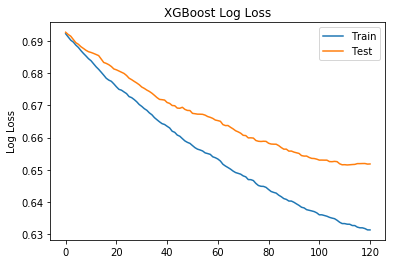

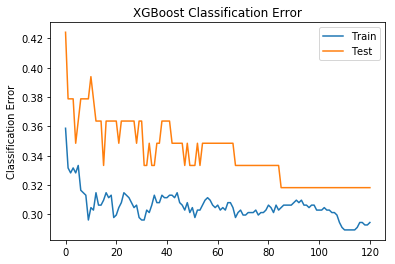

In [298]:
from xgboost.sklearn import XGBClassifier
model_m = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=3, 
                      gamma=10)
eval_set = [(X_train_m, y_train_m), (X_test_m, y_test_m)]
model_m.fit(X_train_m, y_train_m, early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set,verbose=True)
# make predictions for test data
y_pred = model_m.predict(X_test_m)
predictions_mexp_test = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test_m, predictions_mexp_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model_m.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

### Display Classification Report of the above model

In [299]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test_m, predictions_mexp_train))
print ('F1 score:', f1_score(y_test_m, predictions_mexp_test))
print ('Recall:', recall_score(y_test_m, predictions_mexp_test))
print ('Precision:', precision_score(y_test_m, predictions_mexp_test))
print ('\n clasification report:\n', classification_report(y_test_m,predictions_mexp_test))
print ('\n confussion matrix:\n',confusion_matrix(y_test_m, predictions_mexp_train))

Accuracy: 0.6818181818181818
F1 score: 0.5882352941176471
Recall: 0.4411764705882353
Precision: 0.8823529411764706

 clasification report:
               precision    recall  f1-score   support

           0       0.61      0.94      0.74        32
           1       0.88      0.44      0.59        34

   micro avg       0.68      0.68      0.68        66
   macro avg       0.75      0.69      0.66        66
weighted avg       0.75      0.68      0.66        66


 confussion matrix:
 [[30  2]
 [19 15]]


## Manually tuning hyper-parameters and assigning weights to different modalities during Late Fusion

### COMBINE MEXP+GAZE+AUDIO

In [275]:
h_a=0.5
h_m=0.5
h_g=0.3

y_pred_a = model_a.predict(X_test_a)
y_pred_m = model_m.predict(X_test_m)
y_pred_g = model_g.predict(X_test_g)

final_pred= h_a*y_pred_a + h_m*y_pred_m + h_g*y_pred_g
final_pred = [round(value) for value in final_pred]
if(y_test_m==y_test_a):
    if(y_test_a==y_test_g):
        y_test=y_test_a
print ('Accuracy:', accuracy_score(y_test, final_pred))
print ('F1 score:', f1_score(y_test, final_pred))
print ('Recall:', recall_score(y_test, final_pred))
print ('Precision:', precision_score(y_test, final_pred))
print ('\n clasification report:\n', classification_report(y_test,final_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, final_pred))

Accuracy: 0.6212121212121212
F1 score: 0.4444444444444445
Recall: 0.29411764705882354
Precision: 0.9090909090909091

 clasification report:
               precision    recall  f1-score   support

           0       0.56      0.97      0.71        32
           1       0.91      0.29      0.44        34

   micro avg       0.62      0.62      0.62        66
   macro avg       0.74      0.63      0.58        66
weighted avg       0.74      0.62      0.57        66


 confussion matrix:
 [[31  1]
 [24 10]]


### COMBINE MEXP+GAZE

In [279]:
h_m=0.7
h_g=0.1

y_pred_m = model_m.predict(X_test_m)
y_pred_g = model_g.predict(X_test_g)

final_pred= h_m*y_pred_m + h_g*y_pred_g
final_pred = [round(value) for value in final_pred]
if(y_test_m==y_test_g):
        y_test=y_test_g
print ('Accuracy:', accuracy_score(y_test, final_pred))
print ('F1 score:', f1_score(y_test, final_pred))
print ('Recall:', recall_score(y_test, final_pred))
print ('Precision:', precision_score(y_test, final_pred))
print ('\n clasification report:\n', classification_report(y_test,final_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, final_pred))

Accuracy: 0.6818181818181818
F1 score: 0.5882352941176471
Recall: 0.4411764705882353
Precision: 0.8823529411764706

 clasification report:
               precision    recall  f1-score   support

           0       0.61      0.94      0.74        32
           1       0.88      0.44      0.59        34

   micro avg       0.68      0.68      0.68        66
   macro avg       0.75      0.69      0.66        66
weighted avg       0.75      0.68      0.66        66


 confussion matrix:
 [[30  2]
 [19 15]]


### COMBINE GAZE+AUDIO

In [288]:
h_a=0.8
h_g=0.4

y_pred_a = model_a.predict(X_test_a)
y_pred_g = model_g.predict(X_test_g)

final_pred= h_a*y_pred_a + h_g*y_pred_g
final_pred = [round(value) for value in final_pred]

if(y_test_a==y_test_g):
    y_test=y_test_a
print ('Accuracy:', accuracy_score(y_test, final_pred))
print ('F1 score:', f1_score(y_test, final_pred))
print ('Recall:', recall_score(y_test, final_pred))
print ('Precision:', precision_score(y_test, final_pred))
print ('\n clasification report:\n', classification_report(y_test,final_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, final_pred))

Accuracy: 0.6818181818181818
F1 score: 0.5882352941176471
Recall: 0.4411764705882353
Precision: 0.8823529411764706

 clasification report:
               precision    recall  f1-score   support

           0       0.61      0.94      0.74        32
           1       0.88      0.44      0.59        34

   micro avg       0.68      0.68      0.68        66
   macro avg       0.75      0.69      0.66        66
weighted avg       0.75      0.68      0.66        66


 confussion matrix:
 [[30  2]
 [19 15]]


### COMBINE MEXP+AUDIO

In [292]:
h_a=0.5
h_m=0.6

y_pred_a = model_a.predict(X_test_a)
y_pred_m = model_m.predict(X_test_m)

final_pred= h_a*y_pred_a + h_m*y_pred_m
final_pred = [round(value) for value in final_pred]
if(y_test_m==y_test_a):
        y_test=y_test_a
print ('Accuracy:', accuracy_score(y_test, final_pred))
print ('F1 score:', f1_score(y_test, final_pred))
print ('Recall:', recall_score(y_test, final_pred))
print ('Precision:', precision_score(y_test, final_pred))
print ('\n clasification report:\n', classification_report(y_test,final_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, final_pred))

Accuracy: 0.6818181818181818
F1 score: 0.5882352941176471
Recall: 0.4411764705882353
Precision: 0.8823529411764706

 clasification report:
               precision    recall  f1-score   support

           0       0.61      0.94      0.74        32
           1       0.88      0.44      0.59        34

   micro avg       0.68      0.68      0.68        66
   macro avg       0.75      0.69      0.66        66
weighted avg       0.75      0.68      0.66        66


 confussion matrix:
 [[30  2]
 [19 15]]


## Using Classifier model to vote for the best Modality

Predicted outputs from individual models are further processed by another XGBClassifier

In [314]:
y_pred_a_test = model_a.predict(X_test_a)
y_pred_m_test = model_m.predict(X_test_m)
y_pred_g_test = model_g.predict(X_test_g)
y_pred_a_train = model_a.predict(X_train_a)
y_pred_m_train = model_m.predict(X_train_m)
y_pred_g_train = model_g.predict(X_train_g)
dfObj1 = pd.DataFrame(y_pred_a_train,columns = ['Audio'] )
dfObj2=pd.DataFrame(y_pred_m_train,columns = ['Mexp']) 
dfObj3=pd.DataFrame(y_pred_g_train,columns = ['Gaze'])
dfObj4 = pd.DataFrame(y_pred_a_test,columns = ['Audio']) 
dfObj5=pd.DataFrame(y_pred_m_test,columns = ['Mexp']) 
dfObj6=pd.DataFrame(y_pred_g_test,columns = ['Gaze'])
df_train_data = pd.concat([dfObj1, dfObj2, dfObj3], axis=1)
df_test_data = pd.concat([dfObj4, dfObj5, dfObj6], axis=1)
if(y_test_m==y_test_a):
    if(y_test_a==y_test_g):
        y_test=y_test_a
if(y_train_m==y_train_a):
    if(y_train_a==y_train_g):
        y_train=y_train_a
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=3, 
                      gamma=10)
eval_set = [(df_train_data, y_train), (df_test_data, y_test)]
model.fit(df_train_data, y_train, eval_metric=["error", "logloss"], eval_set=eval_set,early_stopping_rounds=10, verbose=True)
y_pred=model.predict(df_test_data)
final_pred=[round(value) for value in y_pred]
print ('Accuracy:', accuracy_score(y_test, final_pred))
print ('F1 score:', f1_score(y_test, final_pred))
print ('Recall:', recall_score(y_test, final_pred))
print ('Precision:', precision_score(y_test, final_pred))
print ('\n clasification report:\n', classification_report(y_test,final_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, final_pred))

[0]	validation_0-error:0.174281	validation_0-logloss:0.688917	validation_1-error:0.318182	validation_1-logloss:0.690711
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.174281	validation_0-logloss:0.687758	validation_1-error:0.318182	validation_1-logloss:0.690089
[2]	validation_0-error:0.191201	validation_0-logloss:0.686626	validation_1-error:0.333333	validation_1-logloss:0.689501
[3]	validation_0-error:0.174281	validation_0-logloss:0.682461	validation_1-error:0.318182	validation_1-logloss:0.68711
[4]	validation_0-error:0.191201	validation_0-logloss:0.681263	validation_1-error:0.333333	validation_1-logloss:0.686489
[5]	validation_0-error:0.174281	validation_0-logloss:0.677236	validation_1-error:0.318182	validation_1-logloss:0.684195
[6]	validation_0-error:0.174281	validation_0-logloss:0.67333	validation_1-error:0.318182	validation_1-logloss:0.6819

[67]	validation_0-error:0.177665	validation_0-logloss:0.57973	validation_1-error:0.318182	validation_1-logloss:0.623005
[68]	validation_0-error:0.177665	validation_0-logloss:0.577331	validation_1-error:0.318182	validation_1-logloss:0.621907
[69]	validation_0-error:0.177665	validation_0-logloss:0.575004	validation_1-error:0.318182	validation_1-logloss:0.62084
[70]	validation_0-error:0.177665	validation_0-logloss:0.574297	validation_1-error:0.318182	validation_1-logloss:0.620168
[71]	validation_0-error:0.177665	validation_0-logloss:0.573863	validation_1-error:0.318182	validation_1-logloss:0.620076
[72]	validation_0-error:0.177665	validation_0-logloss:0.571569	validation_1-error:0.318182	validation_1-logloss:0.619046
[73]	validation_0-error:0.177665	validation_0-logloss:0.57117	validation_1-error:0.318182	validation_1-logloss:0.618932
[74]	validation_0-error:0.177665	validation_0-logloss:0.569004	validation_1-error:0.318182	validation_1-logloss:0.617946
[75]	validation_0-error:0.177665	va

[135]	validation_0-error:0.177665	validation_0-logloss:0.518509	validation_1-error:0.318182	validation_1-logloss:0.592102
[136]	validation_0-error:0.177665	validation_0-logloss:0.518105	validation_1-error:0.318182	validation_1-logloss:0.591719
[137]	validation_0-error:0.177665	validation_0-logloss:0.51809	validation_1-error:0.318182	validation_1-logloss:0.591817
[138]	validation_0-error:0.177665	validation_0-logloss:0.517715	validation_1-error:0.318182	validation_1-logloss:0.591441
[139]	validation_0-error:0.177665	validation_0-logloss:0.516353	validation_1-error:0.318182	validation_1-logloss:0.591008
[140]	validation_0-error:0.177665	validation_0-logloss:0.51502	validation_1-error:0.318182	validation_1-logloss:0.590574
[141]	validation_0-error:0.177665	validation_0-logloss:0.51469	validation_1-error:0.318182	validation_1-logloss:0.590226
[142]	validation_0-error:0.177665	validation_0-logloss:0.514381	validation_1-error:0.318182	validation_1-logloss:0.589895
[143]	validation_0-error:0.

[203]	validation_0-error:0.177665	validation_0-logloss:0.488221	validation_1-error:0.318182	validation_1-logloss:0.581529
[204]	validation_0-error:0.177665	validation_0-logloss:0.487394	validation_1-error:0.318182	validation_1-logloss:0.581355
[205]	validation_0-error:0.177665	validation_0-logloss:0.486469	validation_1-error:0.318182	validation_1-logloss:0.581254
[206]	validation_0-error:0.177665	validation_0-logloss:0.485653	validation_1-error:0.318182	validation_1-logloss:0.581107
[207]	validation_0-error:0.177665	validation_0-logloss:0.484827	validation_1-error:0.318182	validation_1-logloss:0.580936
[208]	validation_0-error:0.177665	validation_0-logloss:0.484825	validation_1-error:0.318182	validation_1-logloss:0.580965
[209]	validation_0-error:0.177665	validation_0-logloss:0.484822	validation_1-error:0.318182	validation_1-logloss:0.581019
[210]	validation_0-error:0.177665	validation_0-logloss:0.484819	validation_1-error:0.318182	validation_1-logloss:0.581059
[211]	validation_0-error

### Display the Feature Importance for the modalities && Print weights given to each modality by the XGBClassifier

[0.57697785 0.21712941 0.20589271]


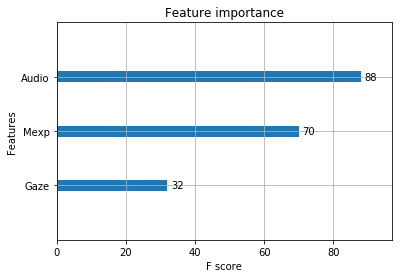

In [319]:
from matplotlib import pyplot
from xgboost import plot_importance
# feature importance
print(model.feature_importances_)
plot_importance(model)
pyplot.show()

### RandomForestClassifier is used to vote for the feature Importance

In [320]:
from sklearn.ensemble import RandomForestClassifier
y_pred_a_test = model_a.predict(X_test_a)
y_pred_m_test = model_m.predict(X_test_m)
y_pred_g_test = model_g.predict(X_test_g)
y_pred_a_train = model_a.predict(X_train_a)
y_pred_m_train = model_m.predict(X_train_m)
y_pred_g_train = model_g.predict(X_train_g)
dfObj1 = pd.DataFrame(y_pred_a_train,columns = ['Audio'] )
dfObj2=pd.DataFrame(y_pred_m_train,columns = ['Mexp']) 
dfObj3=pd.DataFrame(y_pred_g_train,columns = ['Gaze'])
dfObj4 = pd.DataFrame(y_pred_a_test,columns = ['Audio']) 
dfObj5=pd.DataFrame(y_pred_m_test,columns = ['Mexp']) 
dfObj6=pd.DataFrame(y_pred_g_test,columns = ['Gaze'])
df_train_data = pd.concat([dfObj1, dfObj2, dfObj3], axis=1)
df_test_data = pd.concat([dfObj4, dfObj5, dfObj6], axis=1)
if(y_test_m==y_test_a):
    if(y_test_a==y_test_g):
        y_test=y_test_a
if(y_train_m==y_train_a):
    if(y_train_a==y_train_g):
        y_train=y_train_a
model_randomforest = RandomForestClassifier(max_depth=2, random_state=0)
model_randomforest.fit(df_train_data, y_train)
y_pred=model_randomforest.predict(df_test_data)
final_pred=[round(value) for value in y_pred]
print ('Accuracy:', accuracy_score(y_test, final_pred))
print ('F1 score:', f1_score(y_test, final_pred))
print ('Recall:', recall_score(y_test, final_pred))
print ('Precision:', precision_score(y_test, final_pred))
print ('\n clasification report:\n', classification_report(y_test,final_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, final_pred))

Accuracy: 0.6818181818181818
F1 score: 0.6037735849056604
Recall: 0.47058823529411764
Precision: 0.8421052631578947

 clasification report:
               precision    recall  f1-score   support

           0       0.62      0.91      0.73        32
           1       0.84      0.47      0.60        34

   micro avg       0.68      0.68      0.68        66
   macro avg       0.73      0.69      0.67        66
weighted avg       0.73      0.68      0.67        66


 confussion matrix:
 [[29  3]
 [18 16]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Print weights given to each modality by the RandomForestClassifier

In [321]:
print(model_randomforest.feature_importances_)

[0.49291383 0.35272099 0.15436517]


### Feature Importance obtained from RandomForestClassifier is plotted

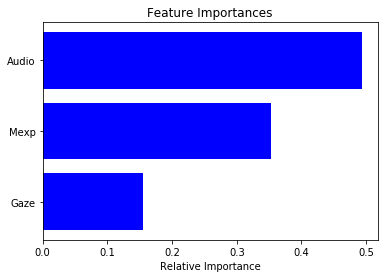

In [322]:
features = ['Audio','Mexp','Gaze']
importances = model_randomforest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()